In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/model_fdata1.csv')

In [ ]:
df.head()

,OID,fid_1,id,tree_cat,Name_Tree_,Photo,Descriptio,Date,in_avgtemp,in_avghum,ot_avgtemp,ot_avghum,tree_den,build_den,dis_to_bui,dis_to_wat,lat,long
0,-1,0,61,1,red bottle brush,C:\Users\jadoo\Downloads\nust_68.JPG,myrtaceae,04/04/2024 0:00,27.198700,36.471699,25.319000,45.326199,15388.000000,184.031006,28.432199,140.891998,33.640695,72.986609
1,-1,3,3,2,spiny fiddlewood,C:\Users\jadoo\Downloads\nust_20.jpg,verbenaceae,07/12/2023 0:00,27.169001,36.469700,25.002199,46.549099,6189.609863,184.031006,13.403100,221.251999,33.639766,72.986525
2,-1,7,1,3,chinar,C:\Users\jadoo\Downloads\nust_76.jpg,known for its leaves(star shape),07/12/2023 0:00,27.061600,36.549500,24.828400,46.957501,2836.899902,92.015404,18.954800,252.356003,33.639244,72.986794
3,-1,9,3,3,chinar,C:\Users\jadoo\Downloads\nust_81.jpg,known for its leaves(star shape),07/12/2023 0:00,27.141701,36.490200,24.891701,46.835999,2922.870117,92.015404,9.477410,242.740005,33.639423,72.986682
4,-1,10,4,3,chinar,C:\Users\jadoo\Downloads\nust_80.jpg,known for its leaves(star shape),07/12/2023 0:00,27.141701,36.490200,24.891701,46.835999,3610.600098,92.015404,9.477410,235.414002,33.639451,72.986661


In [ ]:
X = df[['Name_Tree_', 'dis_to_bui', 'ot_avgtemp', 'dis_to_wat', 'ot_avghum', 'in_avghum', 'tree_den', 'lat', 'long']]
y = df['in_avgtemp']

In [ ]:
X.head()

,Name_Tree_,dis_to_bui,ot_avgtemp,dis_to_wat,ot_avghum,in_avghum,tree_den,lat,long
0,red bottle brush,28.432199,25.319000,140.891998,45.326199,36.471699,15388.000000,33.640695,72.986609
1,spiny fiddlewood,13.403100,25.002199,221.251999,46.549099,36.469700,6189.609863,33.639766,72.986525
2,chinar,18.954800,24.828400,252.356003,46.957501,36.549500,2836.899902,33.639244,72.986794
3,chinar,9.477410,24.891701,242.740005,46.835999,36.490200,2922.870117,33.639423,72.986682
4,chinar,9.477410,24.891701,235.414002,46.835999,36.490200,3610.600098,33.639451,72.986661


In [ ]:
y.head()

0    27.198700
1    27.169001
2    27.061600
3    27.141701
4    27.141701
Name: in_avgtemp, dtype: float64

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
scaler = MinMaxScaler()

ValueError: could not convert string to float: 'pilkhan'

In [ ]:
# Initialize CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, random_state=42, verbose=0)


In [ ]:
# Fit the model
catboost_model.fit(X_train, y_train, cat_features=['Name_Tree_'])


In [ ]:
# Make predictions
y_pred = catboost_model.predict(X_test)



In [ ]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# R-squared score as a percentage
r2_percentage = r2 * 100

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('R^2 Score:', r2)
print('R^2 Score (Percentage):', r2_percentage)

Mean Absolute Error: 0.03360270124102023
Mean Squared Error: 0.002264137132816208
Root Mean Squared Error: 0.047582950022210774
Mean Absolute Percentage Error: 0.12028079183115242
R^2 Score: 0.990226367931915
R^2 Score (Percentage): 99.0226367931915


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming you have trained your CatBoost model and stored it in `catboost_model`

# Make predictions on the test set
y_pred_test = catboost_model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('Test Set Evaluation:')
print('Mean Squared Error:', mse_test)
print('R^2 Score:', r2_test)
print('Mean Absolute Error:', mae_test)

Test Set Evaluation:
Mean Squared Error: 0.002264137132816208
R^2 Score: 0.990226367931915
Mean Absolute Error: 0.03360270124102023


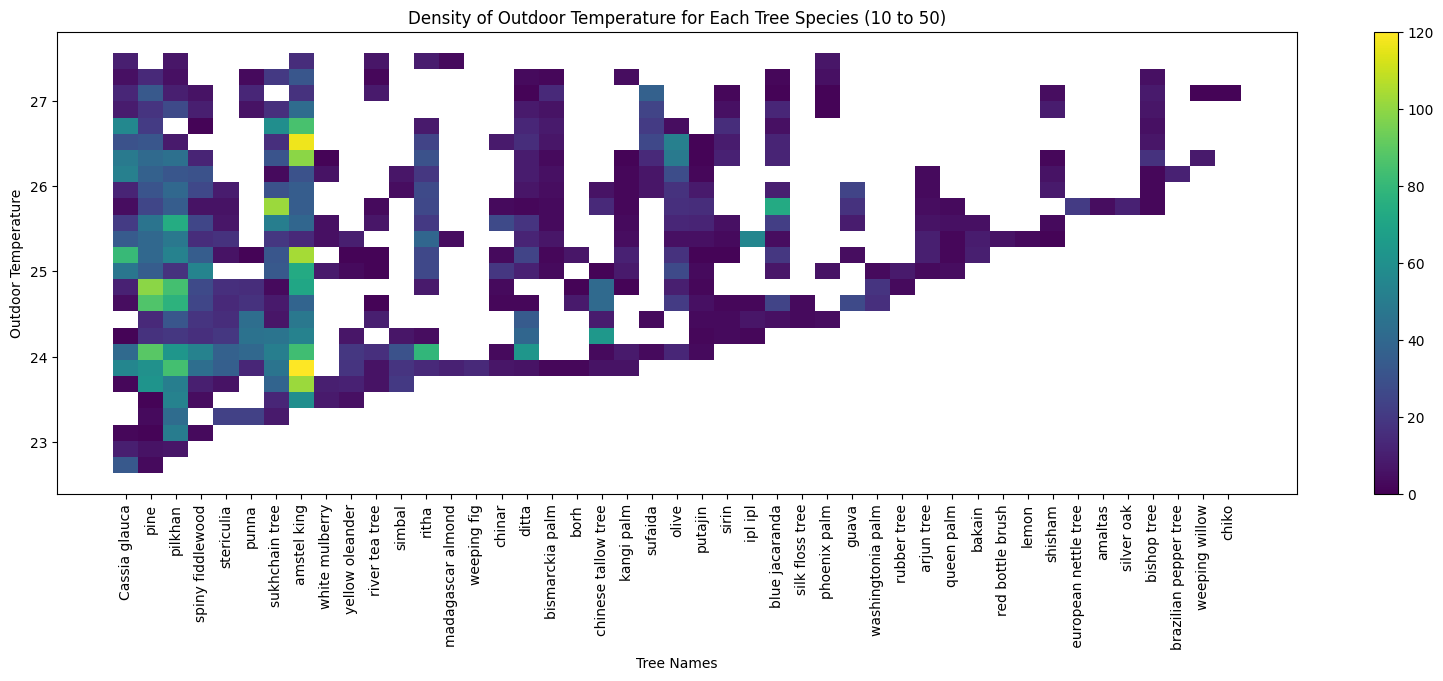

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"/content/drive/MyDrive/model_fdata1.csv")

# Clean data by removing rows with missing values
data.dropna(inplace=True)

# Filter data to include only rows where outdoor temperature is between 10 and 50
filtered_data = data[(data['ot_avgtemp'] >= 10) & (data['ot_avgtemp'] <= 50)]

# Sort the filtered data based on outdoor temperature (out_temp) in ascending order
sorted_data = filtered_data.sort_values(by='ot_avgtemp')

# Create a hexbin plot to visualize the density of outdoor temperature for each tree species
plt.figure(figsize=(20, 6))
sns.histplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', cmap='viridis', bins='auto', cbar=True, kde=True)

# Customize the plot
plt.title('Density of Outdoor Temperature for Each Tree Species (10 to 50)')
plt.xlabel('Tree Names')
plt.ylabel('Outdoor Temperature')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

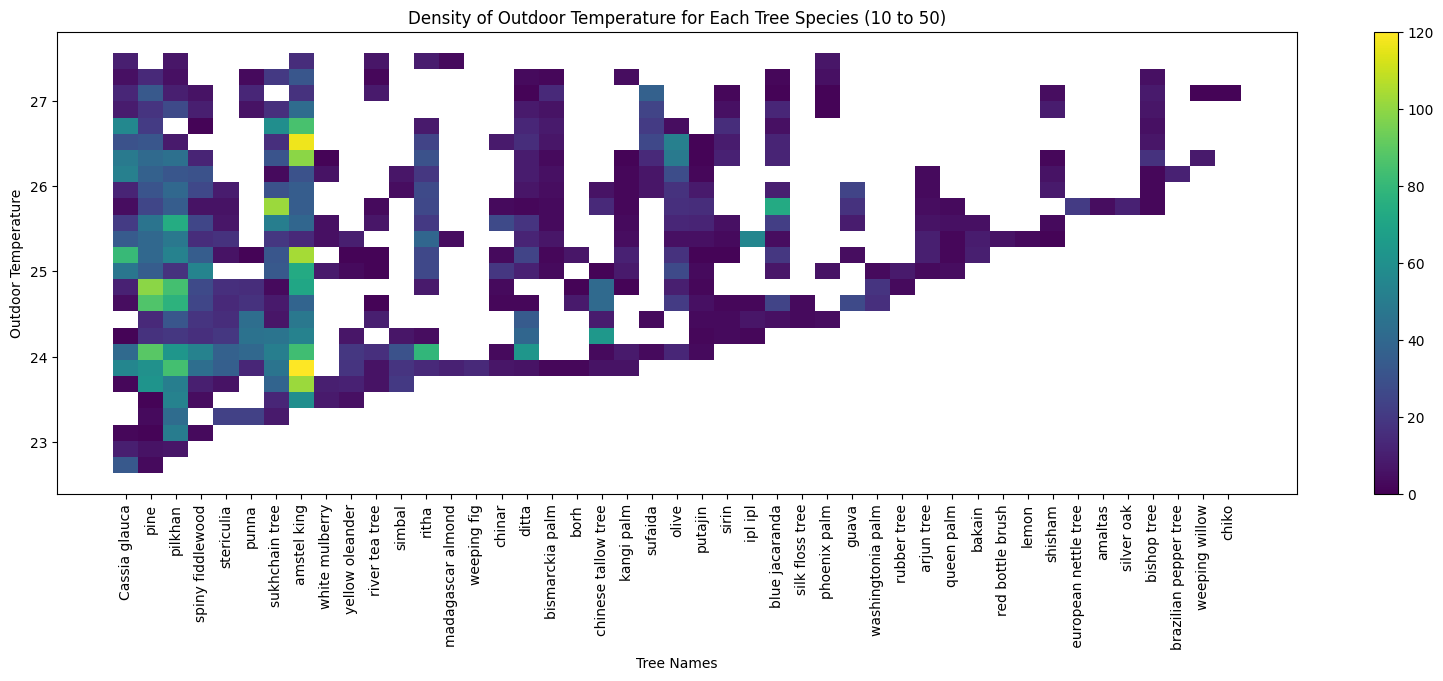

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"/content/drive/MyDrive/model_fdata1.csv")

# Clean data by removing rows with missing values
data.dropna(inplace=True)

# Filter data to include only rows where outdoor temperature is between 10 and 50
filtered_data = data[(data['ot_avgtemp'] >= 10) & (data['ot_avgtemp'] <= 50)]

# Sort the filtered data based on outdoor temperature (out_temp) in ascending order
sorted_data = filtered_data.sort_values(by='ot_avgtemp')

# Create a hexbin plot to visualize the density of outdoor temperature for each tree species
plt.figure(figsize=(20, 6))
sns.histplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', cmap='viridis', bins='auto', cbar=True, kde=True)

# Customize the plot
plt.title('Density of Outdoor Temperature for Each Tree Species (10 to 50)')
plt.xlabel('Tree Names')
plt.ylabel('Outdoor Temperature')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

<ipython-input-9-ce1333a3830a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', palette='viridis')


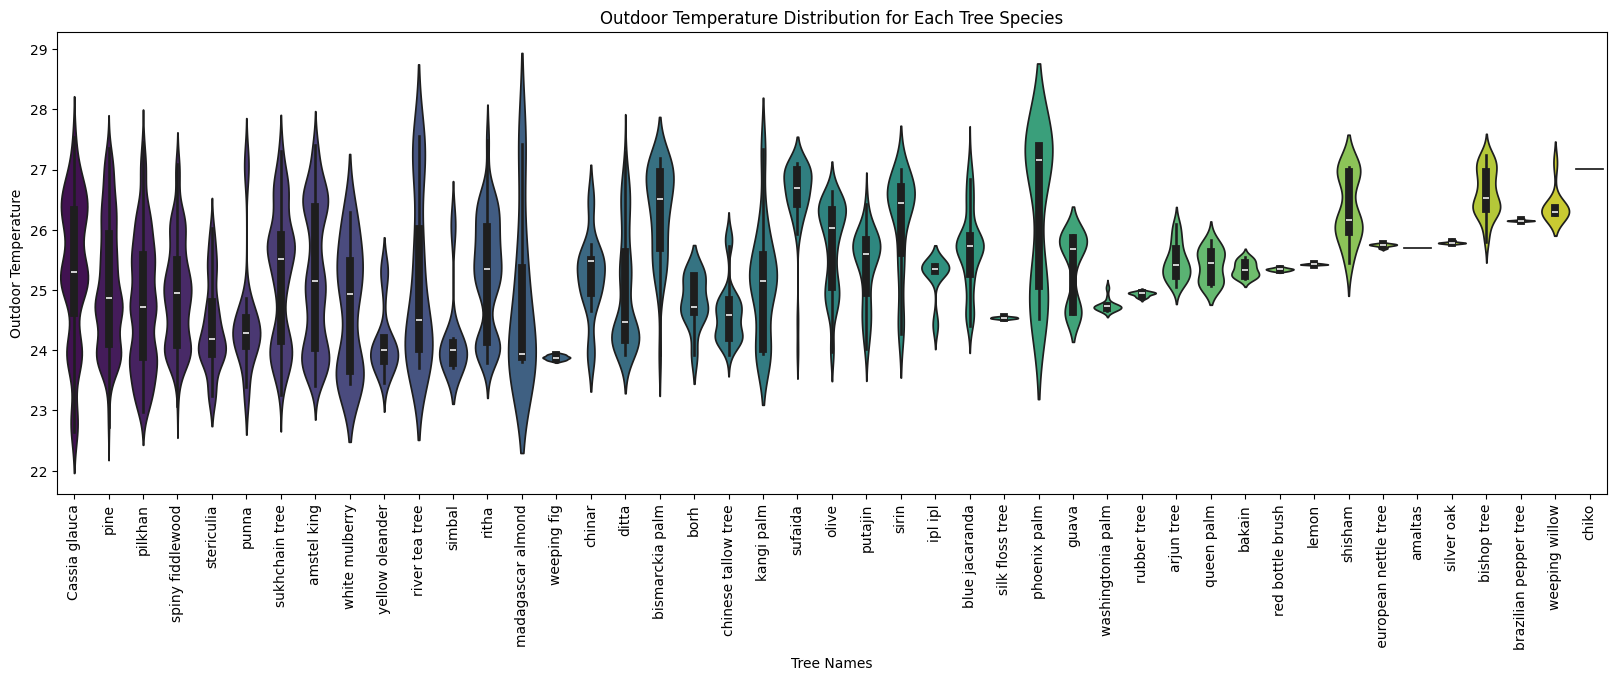

In [ ]:
plt.figure(figsize=(20, 6))
sns.violinplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', palette='viridis')
plt.title('Outdoor Temperature Distribution for Each Tree Species')
plt.xlabel('Tree Names')
plt.ylabel('Outdoor Temperature')
plt.xticks(rotation=90)
plt.show()


<ipython-input-11-39d2e023a901>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', palette='viridis')


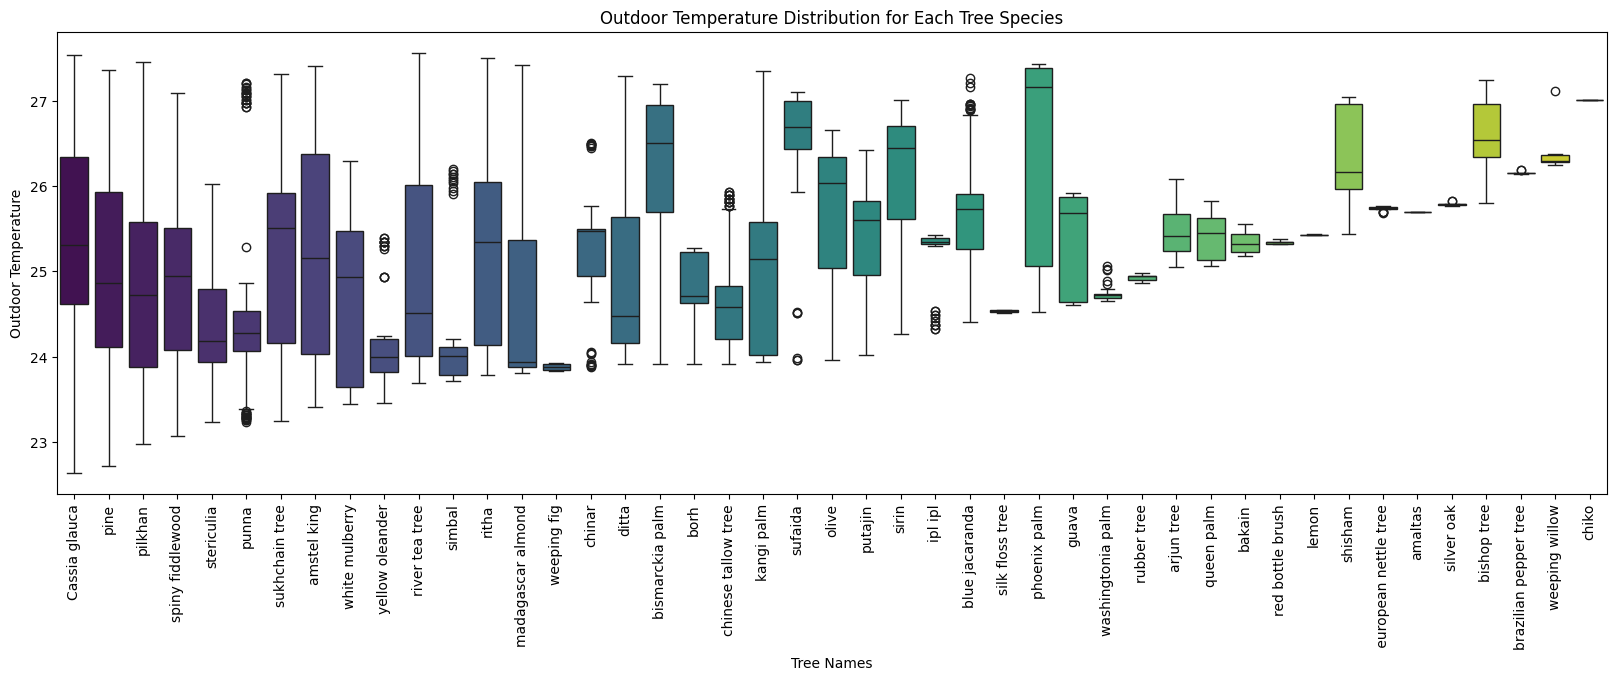

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', palette=sns.color_palette("viridis", as_cmap=True))
plt.title('Outdoor Temperature Distribution for Each Tree Species')
plt.xlabel('Tree Names')
plt.ylabel('Outdoor Temperature')
plt.xticks(rotation=90)
plt.show()


<ipython-input-22-30581398ccbf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Name_Tree_", y="ot_avgtemp", data=sorted_data, palette=colors)
<ipython-input-22-30581398ccbf>:10: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.boxplot(x="Name_Tree_", y="ot_avgtemp", data=sorted_data, palette=colors)


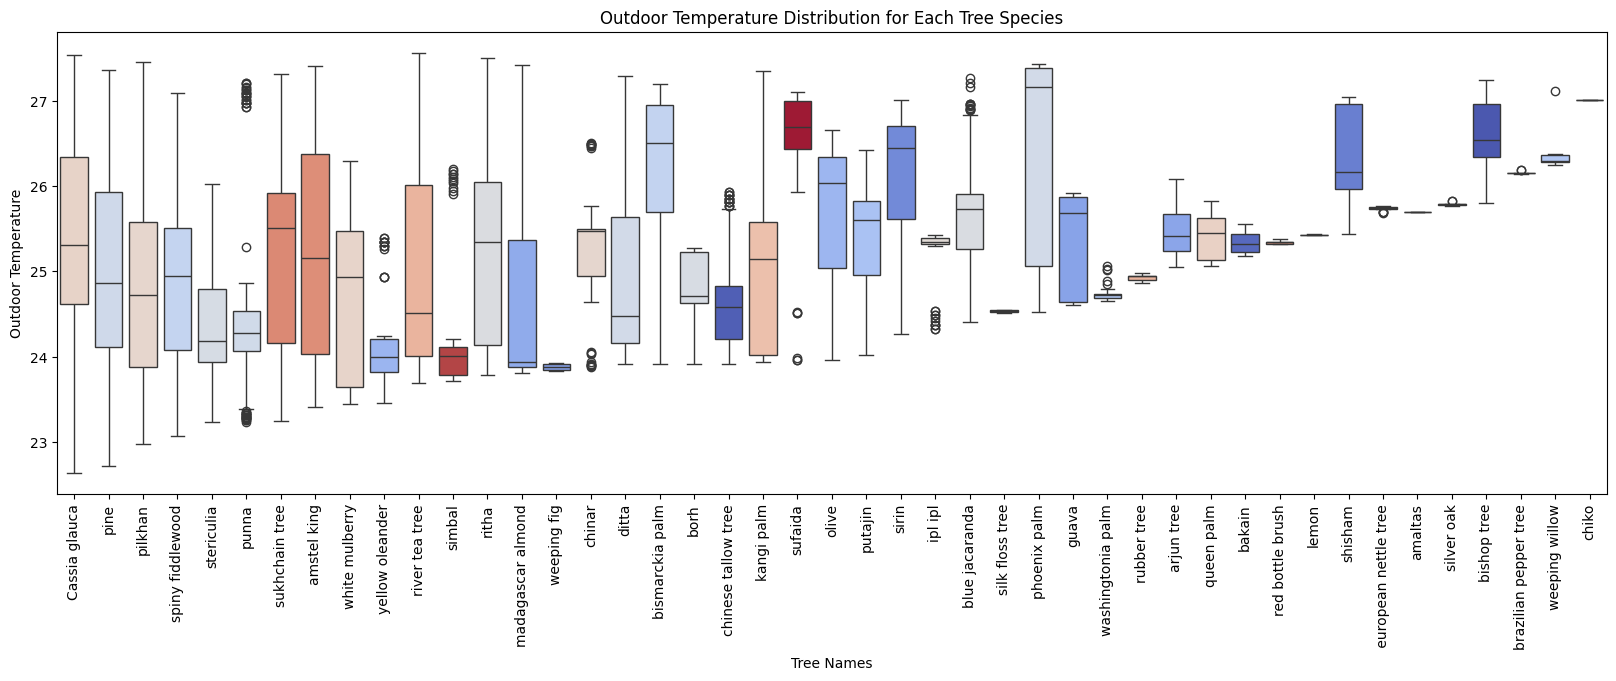

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ot_avgtemp' is represented by 'total_bill' and 'Name_Tree_' is represented by 'day'
median_vals = sorted_data.groupby('Name_Tree_')['ot_avgtemp'].median()
norm = plt.Normalize(median_vals.min(), median_vals.max())
colors = plt.cm.coolwarm(norm(median_vals))

plt.figure(figsize=(20, 6))
ax = sns.boxplot(x="Name_Tree_", y="ot_avgtemp", data=sorted_data, palette=colors)
plt.title('Outdoor Temperature Distribution for Each Tree Species')
plt.xlabel('Tree Names')
plt.ylabel('Outdoor Temperature')
plt.xticks(rotation=90)
plt.show()


<ipython-input-24-908435894fd2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', palette=median_colors)


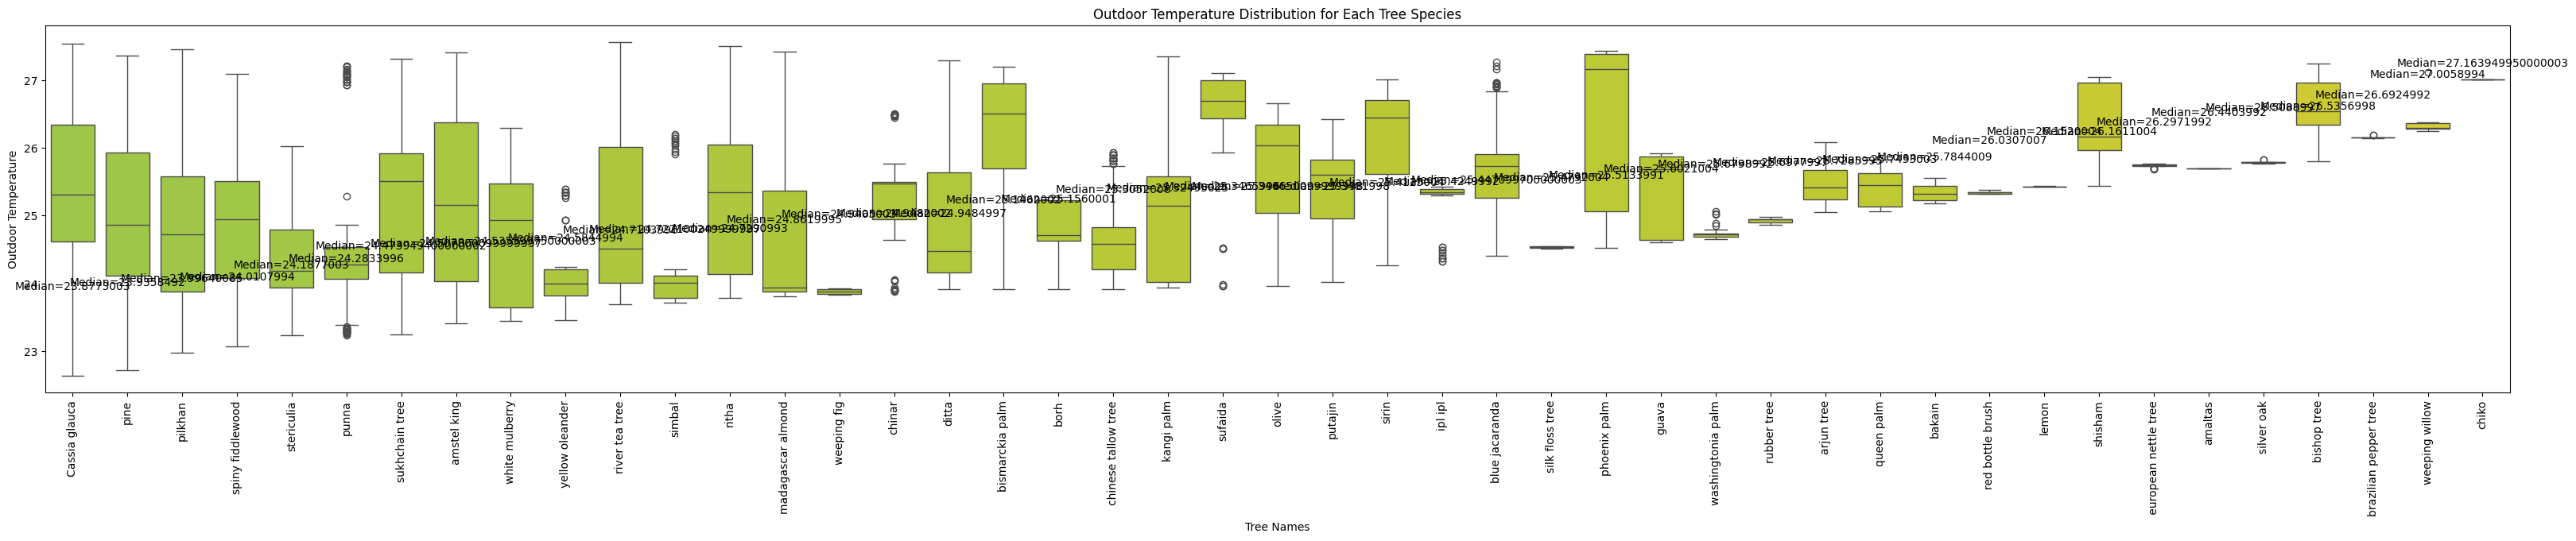

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate median outdoor temperature for each tree species
median_temps = sorted_data.groupby('Name_Tree_')['ot_avgtemp'].median().sort_values()

# Create a custom color palette based on median temperature
color_palette = sns.color_palette("viridis", as_cmap=True)
median_colors = [color_palette(median / sorted_data['ot_avgtemp'].max()) for median in median_temps]

plt.figure(figsize=(40, 6))
ax = sns.boxplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', palette=median_colors)

# Annotate plot with median values
for i, median in enumerate(median_temps):
    ax.text(i, median, f'Median={median}', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Outdoor Temperature Distribution for Each Tree Species')
plt.xlabel('Tree Names')
plt.ylabel('Outdoor Temperature')
plt.xticks(rotation=90)
plt.show()


<ipython-input-25-64ca2e6e6e21>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', palette=median_colors)


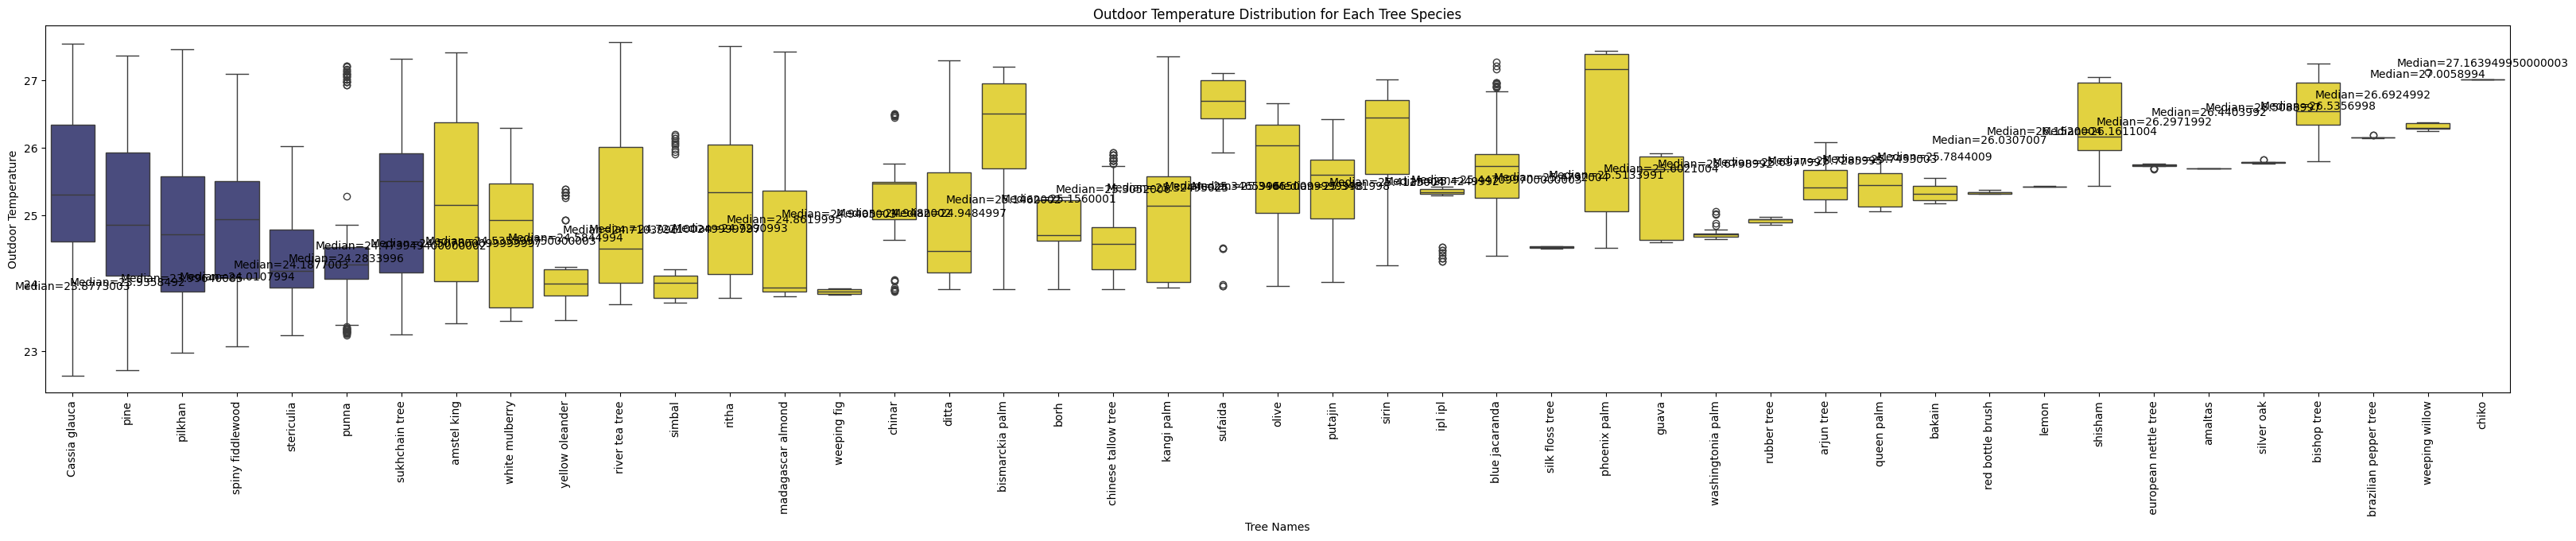

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate median outdoor temperature for each tree species
median_temps = sorted_data.groupby('Name_Tree_')['ot_avgtemp'].median().sort_values()

# Create a custom color palette based on median temperature and threshold
threshold = 24.5
color_palette = sns.color_palette("viridis", as_cmap=True)
median_colors = [color_palette(1.0) if median > threshold else color_palette(0.2) for median in median_temps]

plt.figure(figsize=(40, 6))
ax = sns.boxplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', palette=median_colors)

# Annotate plot with median values
for i, median in enumerate(median_temps):
    ax.text(i, median, f'Median={median}', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Outdoor Temperature Distribution for Each Tree Species')
plt.xlabel('Tree Names')
plt.ylabel('Outdoor Temperature')
plt.xticks(rotation=90)
plt.show()


<ipython-input-31-5fe2b5effa94>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', palette=tree_colors, order=sorted_counts.index)


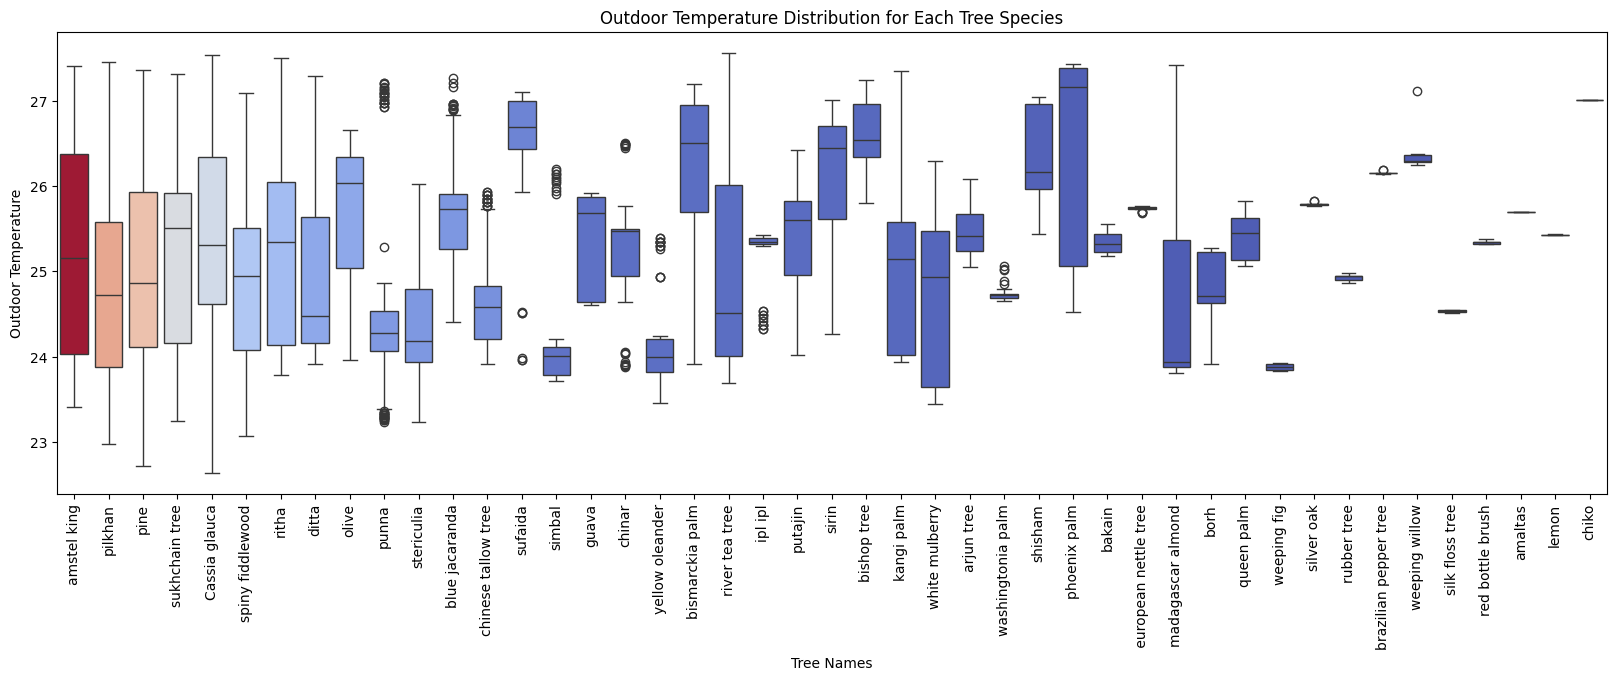

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the count of points in each category of Name_Tree_
tree_counts = sorted_data['Name_Tree_'].value_counts().sort_index()

# Sort the tree_counts Series in descending order of counts
sorted_counts = tree_counts.sort_values(ascending=False)

# Create a custom color palette based on the count of points
color_palette = sns.color_palette("coolwarm", as_cmap=True)
tree_colors = [color_palette(count / sorted_counts.max()) for count in sorted_counts]

plt.figure(figsize=(20, 6))
sns.boxplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', palette=tree_colors, order=sorted_counts.index)
plt.title('Outdoor Temperature Distribution for Each Tree Species')
plt.xlabel('Tree Names')
plt.ylabel('Outdoor Temperature')
plt.xticks(rotation=90)
plt.show()


<ipython-input-32-ceaa93f95c0c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', palette=tree_colors, order=sorted_counts.index)


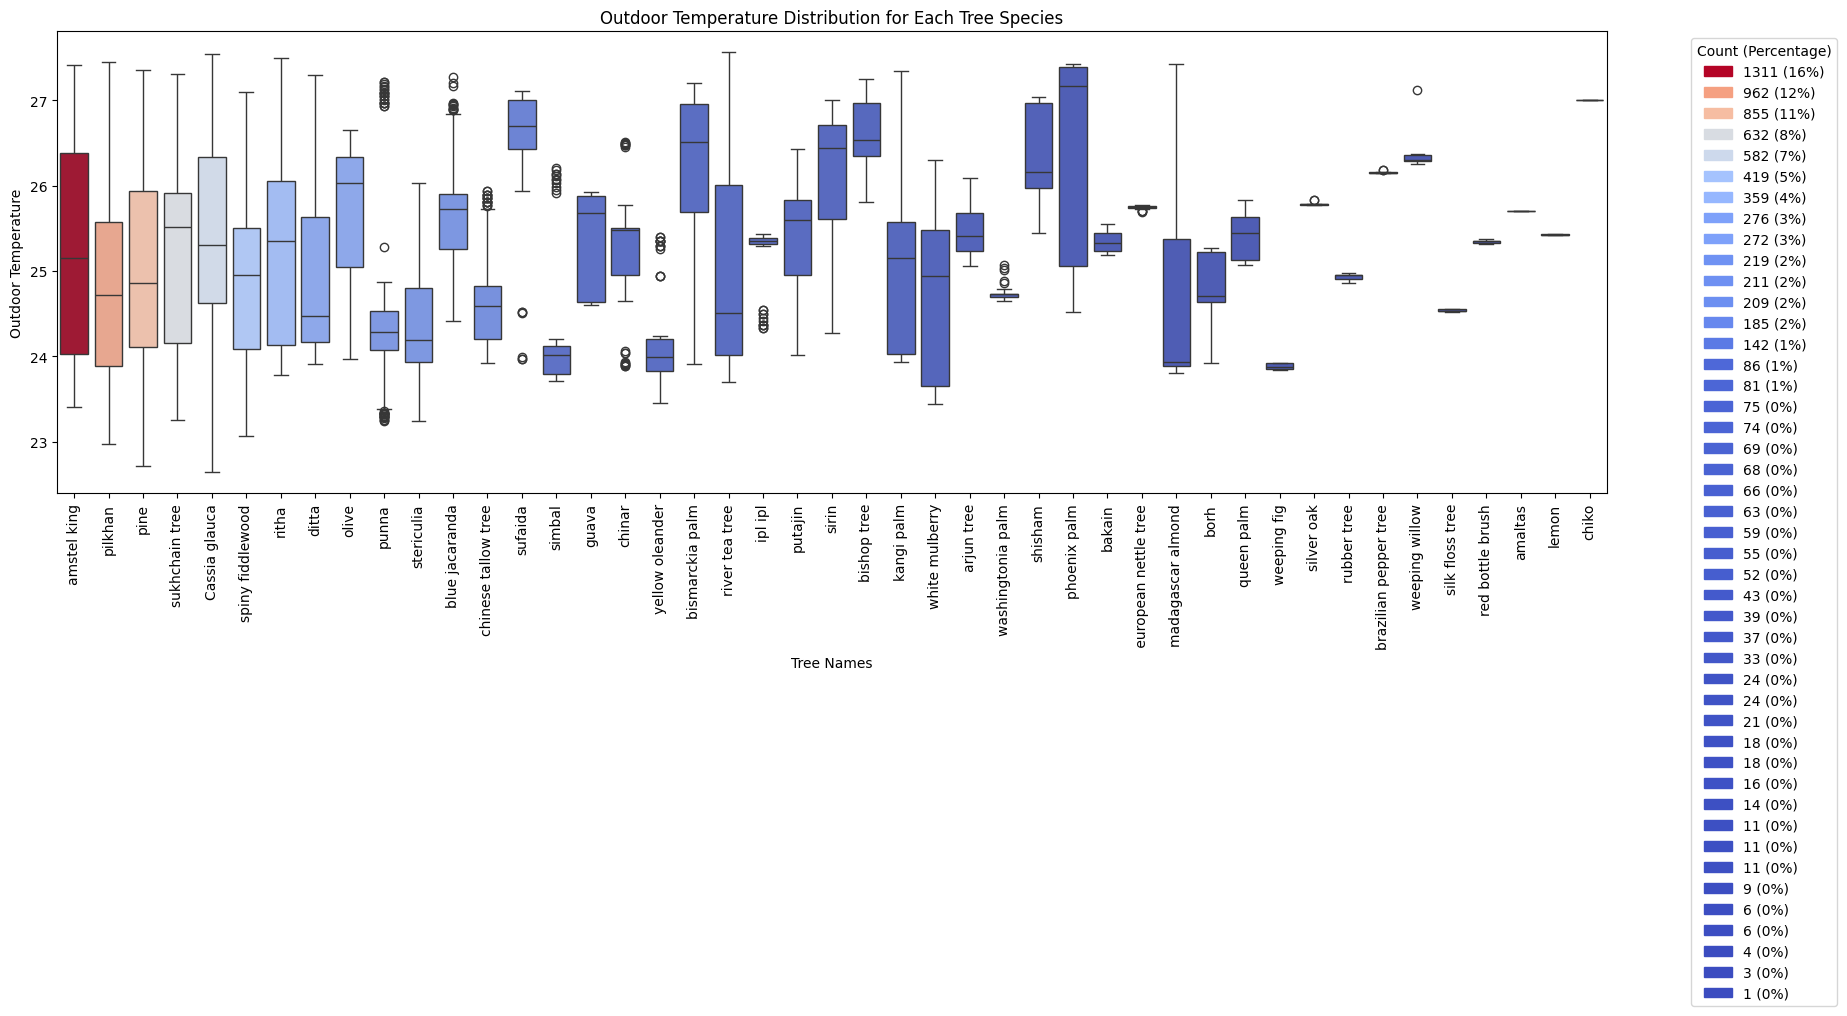

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Calculate the count of points in each category of Name_Tree_
tree_counts = sorted_data['Name_Tree_'].value_counts().sort_index()

# Sort the tree_counts Series in descending order of counts
sorted_counts = tree_counts.sort_values(ascending=False)

# Create a custom color palette based on the count of points
color_palette = sns.color_palette("coolwarm", as_cmap=True)
tree_colors = [color_palette(count / sorted_counts.max()) for count in sorted_counts]

plt.figure(figsize=(20, 6))
sns.boxplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', palette=tree_colors, order=sorted_counts.index)
plt.title('Outdoor Temperature Distribution for Each Tree Species')
plt.xlabel('Tree Names')
plt.ylabel('Outdoor Temperature')
plt.xticks(rotation=90)

# Create custom legend
legend_handles = [mpatches.Patch(color=color, label=f'{count} ({int(count/len(sorted_data)*100)}%)') for count, color in zip(sorted_counts, tree_colors)]
plt.legend(handles=legend_handles, title='Count (Percentage)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


<ipython-input-60-b34da7932f0a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', palette=tree_colors, order=sorted_counts.index)
<ipython-input-60-b34da7932f0a>:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.05, aspect=40)


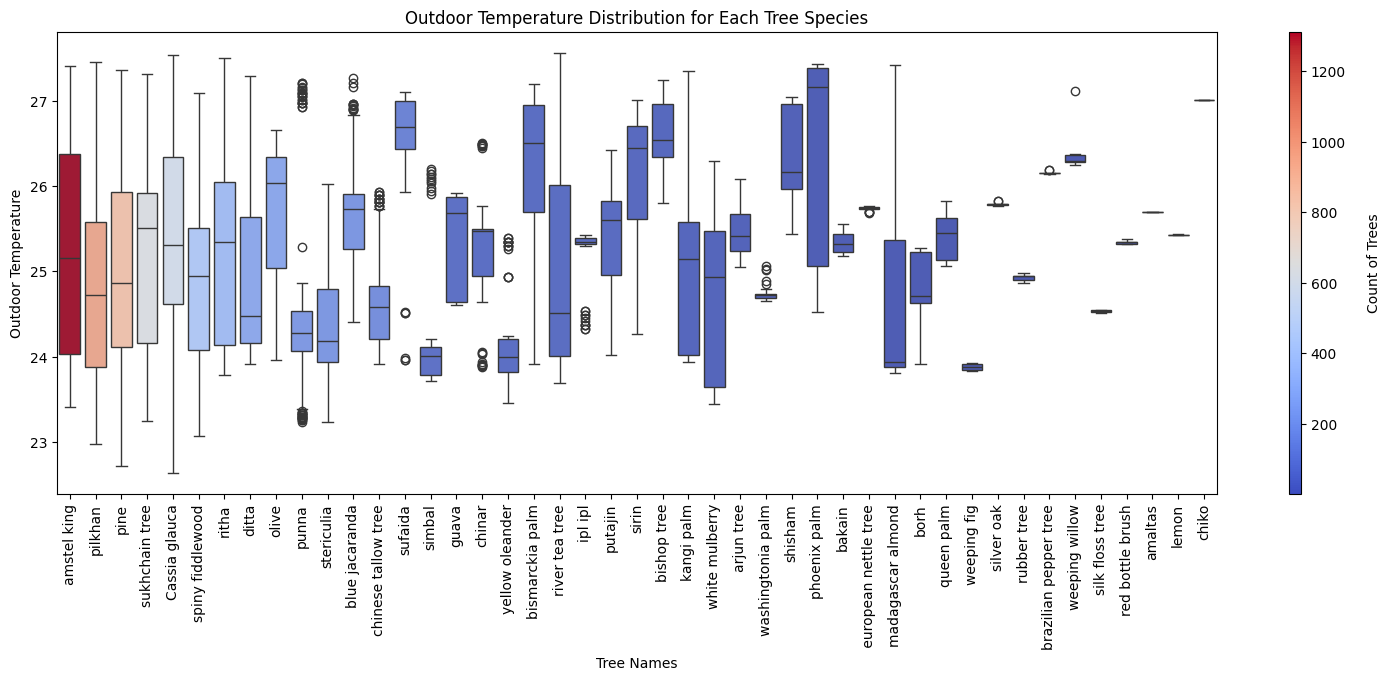

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Calculate the count of points in each category of Name_Tree_
tree_counts = sorted_data['Name_Tree_'].value_counts().sort_index()

# Sort the tree_counts Series in descending order of counts
sorted_counts = tree_counts.sort_values(ascending=False)

# Create a custom color palette based on the count of points
color_palette = sns.color_palette("coolwarm", as_cmap=True)
norm = mcolors.Normalize(vmin=sorted_counts.min(), vmax=sorted_counts.max())
tree_colors = [color_palette(norm(count)) for count in sorted_counts]

plt.figure(figsize=(20, 6))
sns.boxplot(data=sorted_data, x='Name_Tree_', y='ot_avgtemp', palette=tree_colors, order=sorted_counts.index)
plt.title('Outdoor Temperature Distribution for Each Tree Species')
plt.xlabel('Tree Names')
plt.ylabel('Outdoor Temperature')
plt.xticks(rotation=90)

# Create custom colorbar legend
sm = plt.cm.ScalarMappable(cmap=color_palette, norm=norm)
sm.set_array([])  # fake up the array of the scalar mappable

cbar = plt.colorbar(sm, orientation='vertical', pad=0.05, aspect=40)
cbar.set_label('Count of Trees', rotation=90, labelpad=15)

# Position the colorbar legend on the right of the plot
plt.subplots_adjust(right=0.85)

plt.show()


In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/model_fdata1.csv')

In [4]:
df.isna().sum()

OID           0
fid_1         0
id            0
tree_cat      0
Name_Tree_    0
Photo         0
Descriptio    0
Date          0
in_avgtemp    0
in_avghum     0
ot_avgtemp    0
ot_avghum     0
tree_den      0
build_den     0
dis_to_bui    0
dis_to_wat    0
lat           0
long          0
dtype: int64

<ipython-input-5-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

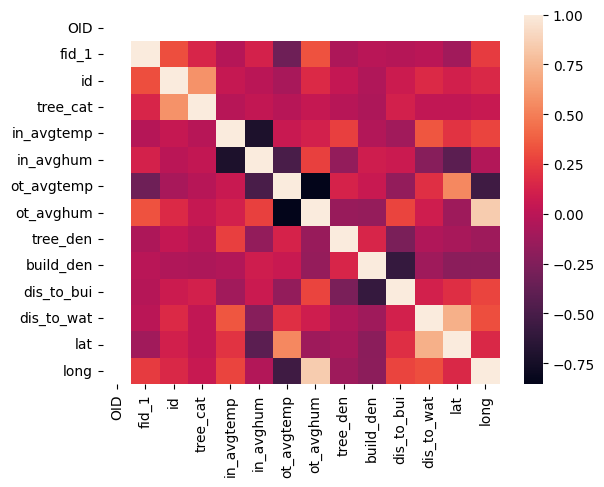

In [5]:
sns.heatmap(df.corr())

In [6]:
#new approach

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [154]:
data = pd.read_csv("/content/drive/MyDrive/model_fdata1.csv")

In [219]:
X = data[['tree_cat', 'ot_avgtemp', 'tree_den', 'dis_to_bui', 'dis_to_wat']]
y = data['in_avgtemp']

In [220]:
# Before Encoding
print("Unique values in tree_cat column:", df['tree_cat'].unique())


Unique values in tree_cat column: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 33 34 29 30 31 32 35 36 37 38 39 40 41 42 43 44 45]


In [221]:
# One-Hot Encoding
encoded_df = pd.get_dummies(df, columns=['tree_cat'], prefix='tree')


In [222]:

# After Encoding
print("Columns after encoding:", encoded_df.columns)

Columns after encoding: Index(['OID', 'fid_1', 'id', 'Name_Tree_', 'Photo', 'Descriptio', 'Date',
       'in_avgtemp', 'in_avghum', 'ot_avgtemp', 'ot_avghum', 'tree_den',
       'build_den', 'dis_to_bui', 'dis_to_wat', 'lat', 'long', 'tree_1',
       'tree_2', 'tree_3', 'tree_4', 'tree_5', 'tree_6', 'tree_7', 'tree_8',
       'tree_9', 'tree_10', 'tree_11', 'tree_12', 'tree_13', 'tree_14',
       'tree_15', 'tree_16', 'tree_17', 'tree_18', 'tree_19', 'tree_20',
       'tree_21', 'tree_22', 'tree_23', 'tree_24', 'tree_25', 'tree_26',
       'tree_27', 'tree_28', 'tree_29', 'tree_30', 'tree_31', 'tree_32',
       'tree_33', 'tree_34', 'tree_35', 'tree_36', 'tree_37', 'tree_38',
       'tree_39', 'tree_40', 'tree_41', 'tree_42', 'tree_43', 'tree_44',
       'tree_45'],
      dtype='object')


In [223]:
# Normalize the numerical feature columns
numerical_features = [ 'ot_avgtemp', 'tree_den', 'build_den', 'dis_to_bui', 'dis_to_wat']
numerical_transformer = MinMaxScaler()

# Combine the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ], remainder = 'passthrough')


In [224]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [178]:
X_train.head()

,tree_cat,ot_avgtemp,tree_den,build_den,dis_to_bui,dis_to_wat
7589,13,23.3237,1547.400024,0.000000,191.903000,29.970200
5220,7,23.5585,13324.799800,92.015404,26.806200,305.196014
7255,7,23.5585,7565.069824,0.000000,114.123001,292.574005
4888,26,24.2924,7565.069824,0.000000,152.819000,417.114014
6797,12,26.4030,8682.639648,0.000000,80.974998,443.923004


In [225]:
# Define the XGBoost model with hyperparameters to mitigate overfitting
model = XGBRegressor(
    max_depth=2,            # Reduce max_depth
    min_child_weight=5,     # Reduce min_child_weight
    subsample=0.9,
    colsample_bytree=0.8,
    reg_alpha=2.0,          # Reduce reg_alpha for less L1 regularization
    reg_lambda=1.5,         # Reduce reg_lambda for less L2 regularization
    n_estimators=1000,
    learning_rate=0.01,
    objective='reg:squarederror',
    random_state=42,
    importance_type='total_gain',  # Use 'total_gain' for feature importance calculation
    tree_method='hist'  # Use 'hist' for faster tree construct
)

# Train the model
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)

In [226]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, median_absolute_error, explained_variance_score

# Calculate additional evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Median Absolute Error (MedAE): {medae:.4f}")
print(f"Explained Variance Score (EVS): {evs:.4f}")
print(f"R Sq score: {r2:.4f}")

Mean Absolute Error (MAE): 0.1369
Median Absolute Error (MedAE): 0.1005
Explained Variance Score (EVS): 0.8303
R Sq score: 0.8295


In [227]:
def create_new_data(tree_species, outdoor_temp, distance_to_building, distance_to_water, tree_density):
    # Create an empty dictionary to hold the new data
    new_data = {}

    # Add columns for each tree species
    for i in range(1, 46):
        new_data[f'tree_{i}'] = [1 if i == tree_species else 0]

    # Add other columns
    new_data['ot_avgtemp'] = [outdoor_temp]
    new_data['dis_to_bui'] = [distance_to_building]
    new_data['dis_to_wat'] = [distance_to_water]
    new_data['tree_den'] = [tree_density]

    # Create a DataFrame from the new data
    new_df = pd.DataFrame(new_data)

    return new_df


In [228]:
# Define the values for the new data point
tree_species = 4 # For example, assuming tree_species 1 is present
outdoor_temp = 25.6
distance_to_building = 85.3
distance_to_water = 151.6
tree_density = 7479

# Create the new data DataFrame
new_data = pd.DataFrame({
    'tree_cat': [tree_species],
    'ot_avgtemp': [outdoor_temp],
    'dis_to_bui': [distance_to_building],
    'dis_to_wat': [distance_to_water],
    'tree_den': [tree_density],
    'build_den': [0]  # Placeholder value for build_den, assuming it's not used in the model
})

# Ensure the new data has the same columns and order as the training data
new_data = new_data[X_train.columns]

# Make a prediction for the new data
new_prediction = model.predict(new_data)

print(f"Predicted Indoor Temperature for New Data: {new_prediction[0]:.4f}")


Predicted Indoor Temperature for New Data: 27.3172


In [177]:
# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=['Importance'])

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

            Importance
dis_to_wat    0.604003
ot_avgtemp    0.304579
tree_den      0.045745
dis_to_bui    0.031136
tree_cat      0.007827
build_den     0.006710


In [249]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, explained_variance_score, r2_score

# Load the data
data = pd.read_csv("/content/drive/MyDrive/model_fdata1.csv")

# Separate features and target
X = data[['tree_cat', 'ot_avgtemp', 'tree_den', 'build_den', 'dis_to_bui', 'dis_to_wat']]
y = data['in_avgtemp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the numerical features
numerical_features = ['ot_avgtemp', 'tree_den', 'build_den', 'dis_to_bui', 'dis_to_wat']
preprocessor = ColumnTransformer(transformers=[('num', MinMaxScaler(), numerical_features)],
                                 remainder='passthrough')

# Train the model
model = XGBRegressor(max_depth=2, min_child_weight=5, subsample=0.9, colsample_bytree=0.8,
                      reg_alpha=2.0, reg_lambda=2.0, n_estimators=2000, learning_rate=0.01,
                      random_state=42, importance_type='total_cover',
                      tree_method='hist')
model.fit(preprocessor.fit_transform(X_train), y_train)

# Make predictions on the test set
y_pred = model.predict(preprocessor.transform(X_test))

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Explained Variance Score (EVS): {evs:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Create a new data point for prediction
new_data = {
    'tree_cat': [14],        # Change tree specieshere
    'ot_avgtemp': [25.6],
    'tree_den': [15000],
    'build_den': [0],
    'dis_to_bui': [20.3],
    'dis_to_wat': [500.6]
}

# Create a DataFrame for the new data point
new_df = pd.DataFrame(new_data)

# Ensure the new data has the same columns and order as the training data
new_df = new_df[X_train.columns]

# Make a prediction for the new data
new_prediction = model.predict(preprocessor.transform(new_df))
print(f"Predicted Indoor Temperature for New Data: {new_prediction[0]:.4f}")



Mean Absolute Error (MAE): 0.1241
Explained Variance Score (EVS): 0.8599
R-squared (R2): 0.8593
Predicted Indoor Temperature for New Data: 28.1509


In [241]:

# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=['Importance'])

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

            Importance
dis_to_bui    0.345256
tree_cat      0.345207
dis_to_wat    0.142011
ot_avgtemp    0.083437
build_den     0.075490
tree_den      0.008599


In [185]:
pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [250]:
# Predict indoor temperature for each point
data['predicted_in_avgtemp'] = model.predict(data[['tree_cat', 'ot_avgtemp', 'tree_den', 'build_den', 'dis_to_bui', 'dis_to_wat']])

# Select the 10 points with the lowest predicted indoor temperature
best_points = data.nsmallest(10, 'predicted_in_avgtemp')

# Output the tree species planted against the best points
best_points[['tree_cat', 'predicted_in_avgtemp']]

,tree_cat,predicted_in_avgtemp
16,4,27.44758
19,4,27.44758
50,7,27.44758
51,7,27.44758
52,7,27.44758
56,7,27.44758
57,7,27.44758
63,9,27.44758
64,9,27.44758
65,9,27.44758
